In [378]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [206]:
# read the file of nations and the continent they belong
continent = pd.read_csv('data/pais_continent.csv').iloc[:,1:4]
continent.columns = ['Nacionalitat', 'Regio', 'Continent']
# delete the space in the data
for i in range(len(continent)):
    for j in range(continent.shape[1]):
        if type(continent.iloc[i,j]) == str:
            continent.iloc[i,j] = " ".join(continent.iloc[i,j].split())
continent.head(10)

,Nacionalitat,Regio,Continent
0,Albània,Europa meridional,Europa
1,Andorra,Europa meridional,Europa
2,Bòsnia i Hercegovina,Europa meridional,Europa
3,Croàcia,Europa meridional,Europa
4,Eslovènia,Europa meridional,Europa
5,Espanya,Europa meridional,Europa
6,Grècia,Europa meridional,Europa
7,Itàlia,Europa meridional,Europa
8,Macedònia,Europa meridional,Europa
9,Malta,Europa meridional,Europa


In [207]:
# read the file and drop the NA
nacionalitat_districte = pd.read_csv('data/nacionalitat_districte_new.csv')
nacionalitat_districte = nacionalitat_districte.dropna(how='any')
# delete the space in the data
for i in range(len(nacionalitat_districte)):
    for j in range(nacionalitat_districte.shape[1]):
        if type( nacionalitat_districte.iloc[i,j]) == str:
            nacionalitat_districte.iloc[i,j] = " ".join(nacionalitat_districte.iloc[i,j].split())
# change the data type from str to float
for i in range(len(nacionalitat_districte)):
    for j in(3,4):
        nacionalitat_districte.iloc[i,j] = float(nacionalitat_districte.iloc[i,j])
# change the column's name
nacionalitat_districte.columns = ['Codi', 'Districte', 'Nacionalitat', 'Nombre', '%']

nacionalitat_distri_c = pd.merge(nacionalitat_districte, continent, on='Nacionalitat', how='left')
nacionalitat_distri_c

,Codi,Districte,Nacionalitat,Nombre,%,Regio,Continent
0,1,CIUTAT VELLA,Població estrangera,47.307,100,NaN,NaN
1,1,CIUTAT VELLA,Pakistan,6.302,13.3,Àsia meridional,Àsia
2,1,CIUTAT VELLA,Itàlia,5.354,11.3,Europa meridional,Europa
3,1,CIUTAT VELLA,Filipines,4.622,9.8,Àsia sud-oriental,Àsia
4,1,CIUTAT VELLA,Bangladesh,3.315,7,Àsia meridional,Àsia
...,...,...,...,...,...,...,...
215,10,SANT MARTÍ,Equador,914,2.2,Amèrica del Sud,Amèrica
216,10,SANT MARTÍ,Hondures,858,2.1,Amèrica central,Amèrica
217,10,SANT MARTÍ,República Dominicana,747,1.8,Carib,Amèrica
218,10,SANT MARTÍ,Portugal,721,1.7,Europa meridional,Europa


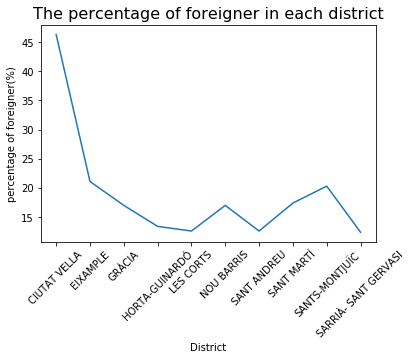

Nombre                                   %             \
Nacionalitat         Espanyola Estrangera TOTAL POBLACIÓ Espanyola Estrangera   
Districte                                                                       
CIUTAT VELLA             54831      47287         102138      53.7       46.3   
EIXAMPLE                210497      56192         266754      78.9       21.1   
GRÀCIA                  100950      20611         121593        83         17   
HORTA-GUINARDÓ          147380      22862         170249      86.6       13.4   
LES CORTS                71835      10334          82182      87.4       12.6   
NOU BARRIS              139773      28546         168327        83         17   
SANT ANDREU             129793      18757         148560      87.4       12.6   
SANT MARTÍ              195858      41228         237112      82.6       17.4   
SANTS-MONTJUÏC          145160      37005         182184      79.7       20.3   
SARRIÀ- SANT GERVASI    131233      18580         149837      87.6       12.4   

                                     
Nacionalitat         TOTAL POBLACIÓ  
Districte                            
CIUTAT VELLA                    100  
EIXAMPLE                        100  
GRÀCIA                          100  
HORTA-GUINARDÓ                  100  
LES CORTS                       100  
NOU BARRIS                      100  
SANT ANDREU                     100  
SANT MARTÍ                      100  
SANTS-MONTJUÏC                  100  
SARRIÀ- SANT GERVASI            100

In [188]:
estrangera = pd.read_csv('data/estrangera.csv')
# delete the space in the data
for i in range(len(estrangera)):
    for j in range(estrangera.shape[1]):
        if type(estrangera.iloc[i,j]) == str:
            estrangera.iloc[i,j] = " ".join(estrangera.iloc[i,j].split())
# change the data type from str to float
for i in range(len(estrangera)):
    for j in(3,4):
        estrangera.iloc[i,j] = float(estrangera.iloc[i,j])
# pivot the dataframe
estrangera = estrangera.pivot(index='Districte', columns='Nacionalitat', values=['Nombre', '%'])
# plot the percentage of foreigner in each district
plt.plot(estrangera.index, estrangera[('%','Estrangera')])
plt.xticks(rotation = 45)
plt.xlabel('District')
plt.ylabel('percentage of foreigner(%)')
plt.title('The percentage of foreigner in each district', fontsize=16)
plt.show()
estrangera


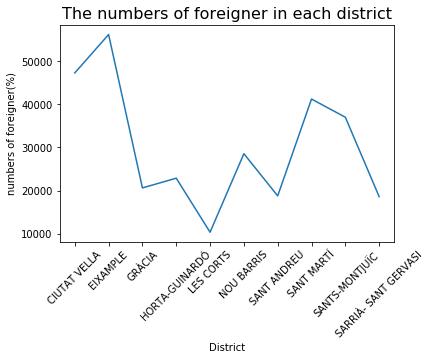

In [189]:
# plot the numbers of foreigner in each district
plt.plot(estrangera.index, estrangera[('Nombre','Estrangera')])
plt.xticks(rotation = 45)
plt.xlabel('District')
plt.ylabel('numbers of foreigner(%)')
plt.title('The numbers of foreigner in each district', fontsize=16)
plt.show()

In [276]:
# cleaning the data by region and continent
nacionalitat_region = nacionalitat_distri_c.groupby(['Codi', 'Districte', 'Regio'])[['%']].sum()
nacionalitat_region.reset_index(inplace=True)
nacionalitat_region = nacionalitat_region.pivot(index= 'Districte', columns='Regio', values='%')
nacionalitat_region.fillna(0, inplace=True)

nacionalitat_continent = nacionalitat_distri_c.groupby(['Codi', 'Districte', 'Continent'])[['%']].sum()
nacionalitat_continent.reset_index(inplace=True)
nacionalitat_continent = nacionalitat_continent.pivot(index= 'Districte', columns='Continent', values='%')
nacionalitat_continent['Else']= 100 - nacionalitat_continent.sum(axis=1)
#nacionalitat_region
nacionalitat_continent

Continent,Amèrica,Europa,Àfrica,Àsia,Else
Districte,,,,,
CIUTAT VELLA,9.7,27.8,5.7,35.1,21.7
EIXAMPLE,24.5,32.2,1.9,15.1,26.3
GRÀCIA,22.8,37.7,2.7,9.4,27.4
HORTA-GUINARDÓ,39.2,20.8,4.5,10.4,25.1
LES CORTS,27.4,30.9,2.1,10.2,29.4
NOU BARRIS,44.4,10.8,8.2,20.6,16.0
SANT ANDREU,34.3,16.3,6.9,21.1,21.4
SANT MARTÍ,21.5,30.3,4.8,18.3,25.1
SANTS-MONTJUÏC,24.8,21.3,5.3,25.3,23.3


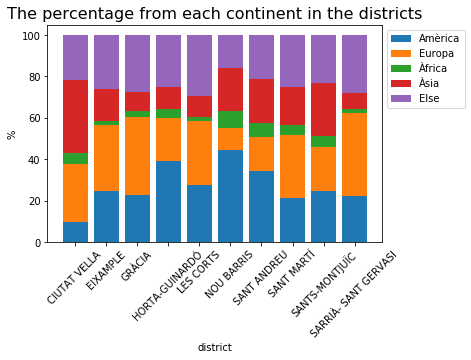

In [377]:
plt.bar(nacionalitat_continent.index, nacionalitat_continent.iloc[:,0])
for i in range(1, nacionalitat_continent.shape[1]):
    plt.bar(nacionalitat_continent.index, nacionalitat_continent.iloc[:,i], bottom = nacionalitat_continent.iloc[:,:i].sum(axis=1))

plt.xticks(rotation = 45)
plt.legend(nacionalitat_continent.columns, loc='upper left', bbox_to_anchor=(1.,1.))
plt.xlabel('district')
plt.ylabel('%')
plt.title('The percentage from each continent in the districts', fontsize=16)
plt.show()